# reproduce an issue with pymc4

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],-0.355,0.127,-0.612,-0.127,0.004,0.003,1185.0,1497.0,1.0
betas[1],1.085,0.070,0.949,1.212,0.002,0.001,1755.0,2131.0,1.0
betas[2],2.169,0.068,2.049,2.308,0.002,0.001,1207.0,1505.0,1.0


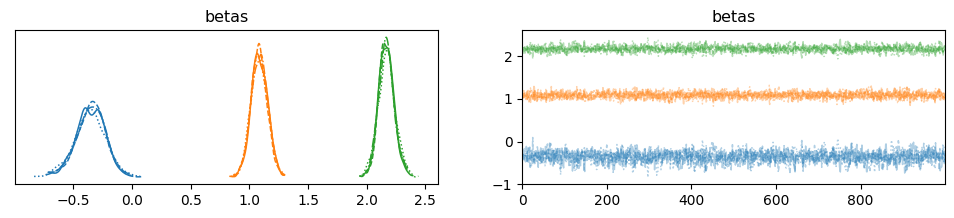

In [38]:
import numpy as np
import pymc as pm
import arviz as az

# k is the train set
n = 100
k = int(n * 0.8)

# dependent and response variables
# data is 2d array of shape (n, 2), linearly related to the response as a count
data = np.random.normal(size=(n, 2))
y = np.exp(data[:, 0] + data[:, 1] * 2)
y[k:] = np.nan

# now we fit a poisson model
with pm.Model() as dot_model:
    X = pm.MutableData("X", data[:k])
    observed = pm.MutableData("observed", y[:k])
    betas = pm.Normal("betas", 0, 1e3, shape=3)
    mu = pm.math.exp(betas[0] + pm.math.dot(X, betas[1:]))
    pm.Poisson("y", mu, observed=observed)
    trace = pm.sample()

az.plot_trace(trace)
az.summary(trace)

In [39]:
with dot_model:
    pm.set_data({"X": data, "observed": y})
    ppc = pm.sample_posterior_predictive(trace)

Sampling: [y]
